
## Census Income Project

### Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

### Description of  (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.
Controls for Hispanic Origin by age and sex.
Controls by Race, age and sex.
We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.





### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats
from scipy.stats import zscore
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

### Renaming and Calling the dataset as dataframe

In [2]:
df=pd.read_csv('Census_dataset.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.shape

(32560, 15)

- The dataframe has 32560 rows and 15 columns.

In [4]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

- The dataset has 9 columns as object and 5 columns as integer data types.

In [5]:
df.columns # all the columns of the dataset.

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [6]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
32555    False
32556    False
32557    False
32558    False
32559    False
Length: 32560, dtype: bool

- There are no duplicated values.

In [7]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

- There are no null-values in the dataset.

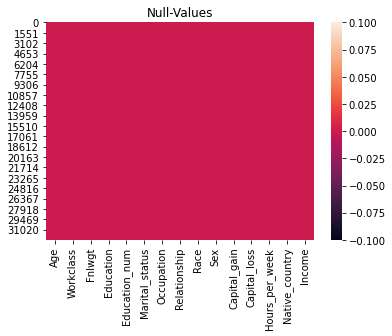

In [8]:
sns.heatmap(df.isnull())
plt.title('Null-Values')
plt.show()

- There are no null-values in the heatmap.

### Checking the values of the uniue values of the columns :-

In [9]:
category_col=['Workclass', 'Education','Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country',
       'Income']
for c in category_col:
    print(c)
    print(df[c].value_counts())

Workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
Education
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64
Marital_status
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64
Occupation
 Prof-specialty       41

- There are 8 types of values , with '?' as null type value in the column 'Workclass'.
- There are 14 types of values in the 'Occupation' column with '?' as null type value.
- There are 41 types of values in the 'Native_country' column with '?' as null type value.
- The target varibale 'Income' have 2 types of results '<50k' and '>50K'.Thus, it's a classification type problem machine learning.

### Treating the mis-interpreted  values :

In [10]:
dt=['Workclass', 'Education','Occupation','Native_country']
for c in dt:
    print(c)
    print(df[c].value_counts())

Workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
Education
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64
Occupation
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 

In [11]:
df['Workclass'] = df['Workclass'].str.replace('?', 'Private', regex=True) 
df['Occupation'] = df['Occupation'].str.replace('?', 'Prof-specialty', regex=True) 
df['Native_country'] = df['Native_country'].str.replace('?', 'United-States', regex=True) 

In [12]:
dt=['Workclass', 'Education','Occupation','Native_country']
for c in dt:
    print(c)
    print(df[c].value_counts())

Workclass
 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
Education
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64
Occupation
 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 

- The mis-interpreted value has been handled.

In [13]:
df.describe() # numerical data only

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Visualisation of Categorical columns :-

In [14]:
df_visualisation_categorical=df[['Workclass','Education','Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex','Native_country']].copy()
df_visualisation_categorical

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States
...,...,...,...,...,...,...,...,...
32555,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
32556,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
32557,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States
32558,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States


 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


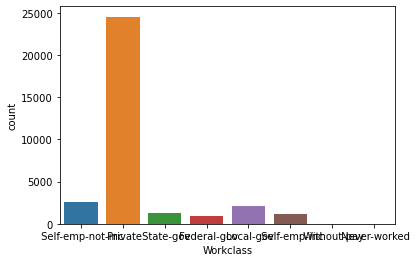

In [15]:
ax=sns.countplot(x='Workclass',data=df_visualisation_categorical)
print(df_visualisation_categorical['Workclass'].value_counts())

- The no of people working under private workclass is highest.
- The no of people unemployed or not working at all is least.

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


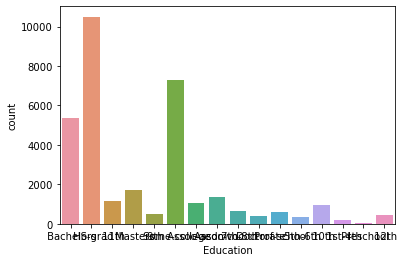

In [16]:
ax=sns.countplot(x='Education',data=df_visualisation_categorical)
print(df_visualisation_categorical['Education'].value_counts())

- The no of people with graduation is highest.
- the no of people with only basic preschool education is least
We can say that almost all people are educated in the record of dataset.

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


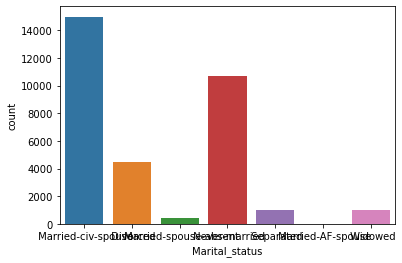

In [17]:
ax=sns.countplot(x='Marital_status',data=df_visualisation_categorical)
print(df_visualisation_categorical['Marital_status'].value_counts())

- The no of people married is higher than that of other un-married or divorced people in the record.

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64


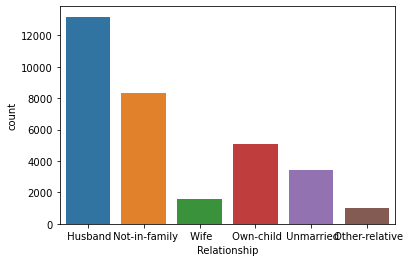

In [18]:
ax=sns.countplot(x='Relationship',data=df_visualisation_categorical)
print(df_visualisation_categorical['Relationship'].value_counts())

- The relationship husband is highest in all relationships. 

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64


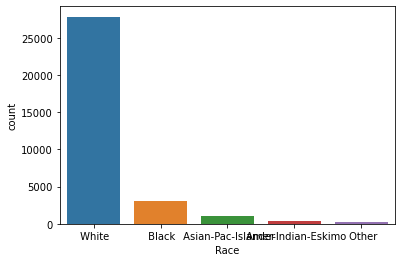

In [19]:
ax=sns.countplot(x='Race',data=df_visualisation_categorical)
print(df_visualisation_categorical['Race'].value_counts())

- The White community is dominating all other communities in the record.

 Male      21789
 Female    10771
Name: Sex, dtype: int64


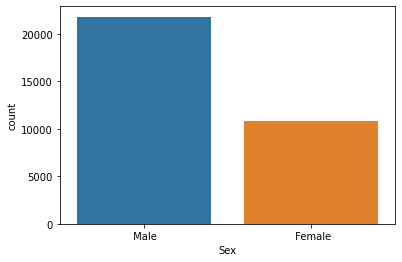

In [20]:
ax=sns.countplot(x='Sex',data=df_visualisation_categorical)
print(df_visualisation_categorical['Sex'].value_counts())

- The no of males is higher than females in the record.

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64


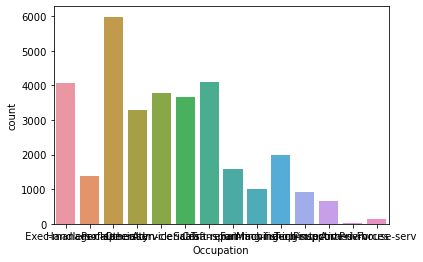

In [21]:
ax=sns.countplot(x='Occupation',data=df_visualisation_categorical)
print(df_visualisation_categorical['Occupation'].value_counts())

- Highest no of people are having thier occupation as 'Prof-specialty '.
- Armed forces is the least preferred occupation among people of this record.

 United-States                 29752
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 Greece                           29
 

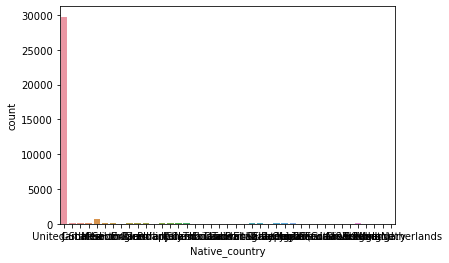

In [22]:
ax=sns.countplot(x='Native_country',data=df_visualisation_categorical)
print(df_visualisation_categorical['Native_country'].value_counts())


##  Numeric data containing variables of the dataset :-

In [23]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [24]:
df_continous=df[['Age','Fnlwgt','Capital_gain','Capital_loss','Hours_per_week']].copy()
df_continous

,Age,Fnlwgt,Capital_gain,Capital_loss,Hours_per_week
0,50,83311,0,0,13
1,38,215646,0,0,40
2,53,234721,0,0,40
3,28,338409,0,0,40
4,37,284582,0,0,40
...,...,...,...,...,...
32555,27,257302,0,0,38
32556,40,154374,0,0,40
32557,58,151910,0,0,40
32558,22,201490,0,0,20


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fnlwgt'}>,
        <AxesSubplot:title={'center':'Education_num'}>],
       [<AxesSubplot:title={'center':'Capital_gain'}>,
        <AxesSubplot:title={'center':'Capital_loss'}>,
        <AxesSubplot:title={'center':'Hours_per_week'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

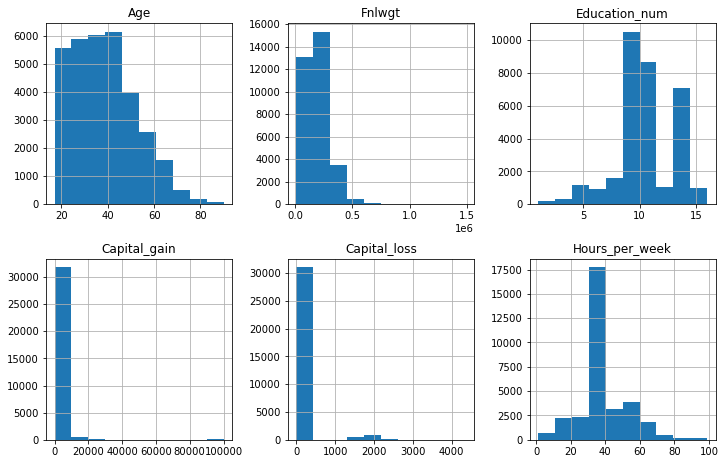

In [25]:
df.hist(figsize=(12,12),layout=(3,3),sharex=False)

- The minimum age is 17 and the maximum is 90 years, most of the working age group lies between 20-40.
- The minimum hours-per-week is 1 and maximum is 90, with most of the count lying between 30-40.

Age                  AxesSubplot(0.125,0.657941;0.227941x0.222059)
Fnlwgt            AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Education_num     AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Capital_gain         AxesSubplot(0.125,0.391471;0.227941x0.222059)
Capital_loss      AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Hours_per_week    AxesSubplot(0.672059,0.391471;0.227941x0.222059)
dtype: object

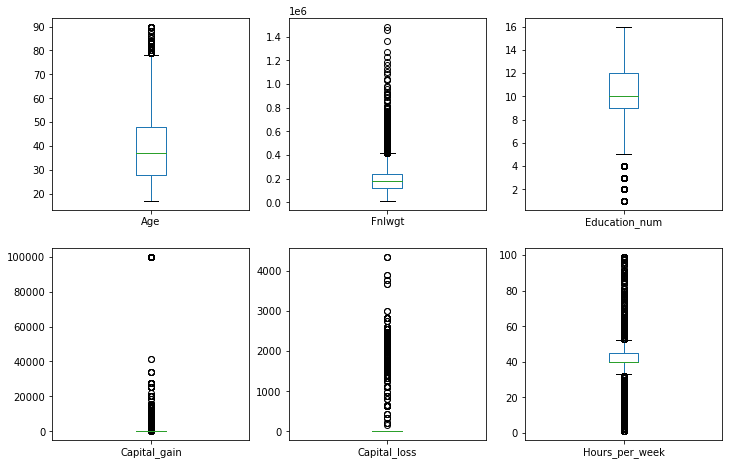

In [26]:
df.plot(kind='box',figsize=(12,12),layout=(3,3),sharex=False,subplots=True)

- Outliers observed in almost all the numeric features, these are the extreme values that are present in the data.

<AxesSubplot:>

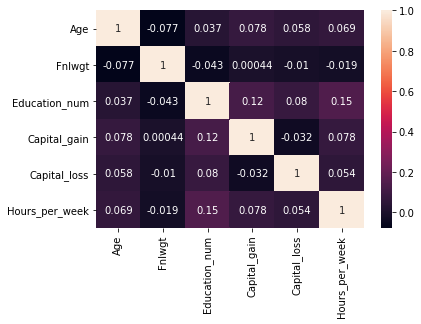

In [27]:
sns.heatmap(df.corr(),annot=True)

- Not very strong correlation observed among variables


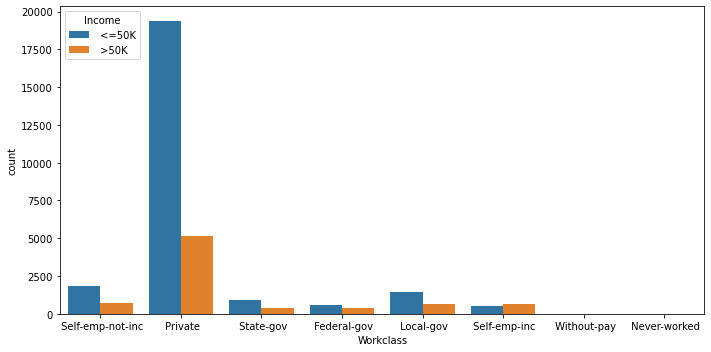

In [28]:
fig = plt.figure(figsize=(10,5))
sns.countplot('Workclass', hue='Income', data=df)
plt.tight_layout()
plt.show()

- Peopel with workclass Private have income lower than 50K than other workclasses.

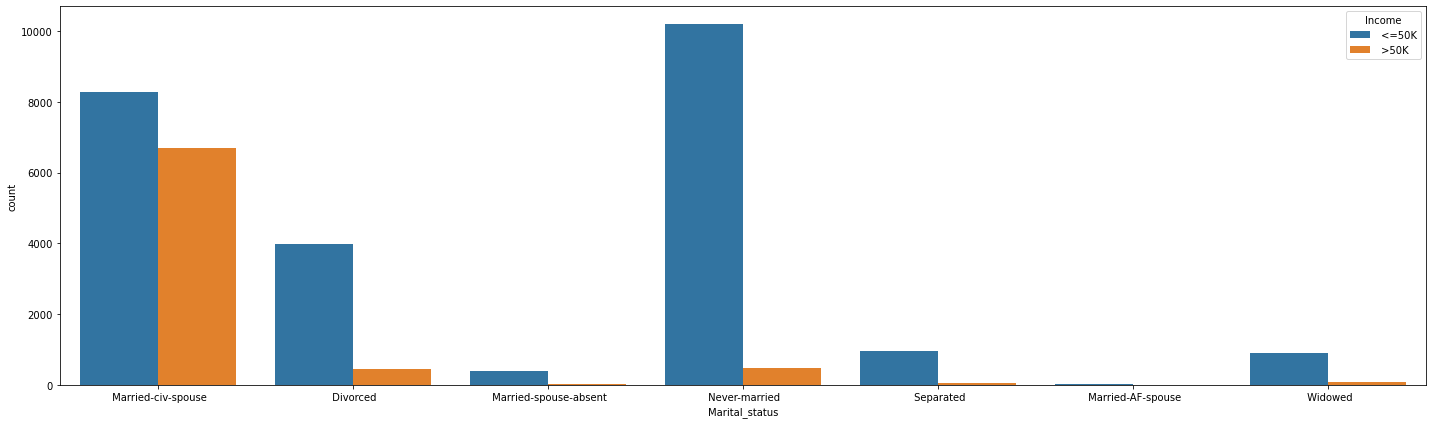

In [29]:
fig = plt.figure(figsize=(20,6))

sns.countplot('Marital_status', hue='Income', data=df)
plt.tight_layout()
plt.show()

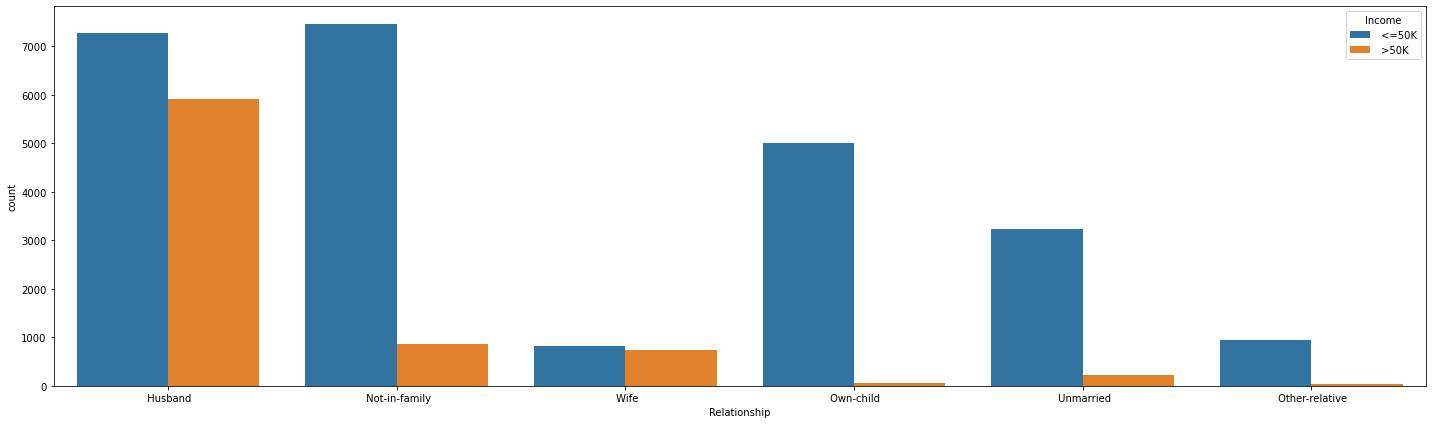

In [30]:
fig = plt.figure(figsize=(20,6))

sns.countplot('Relationship', hue='Income', data=df)
plt.tight_layout()
plt.show()

- Most of the People who are not in family are having salary below 50 K.

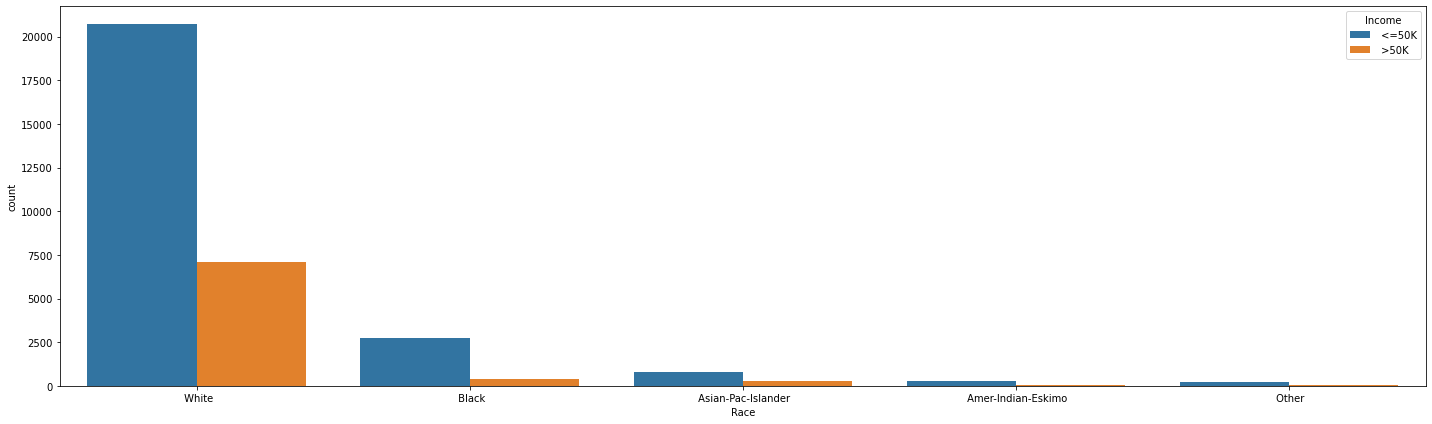

In [31]:
fig = plt.figure(figsize=(20,6))

sns.countplot('Race', hue='Income', data=df)
plt.tight_layout()
plt.show()

- The white community people are having high no of people with both salaries high and below than 50K.

## Mulit-Variate Analysis :-

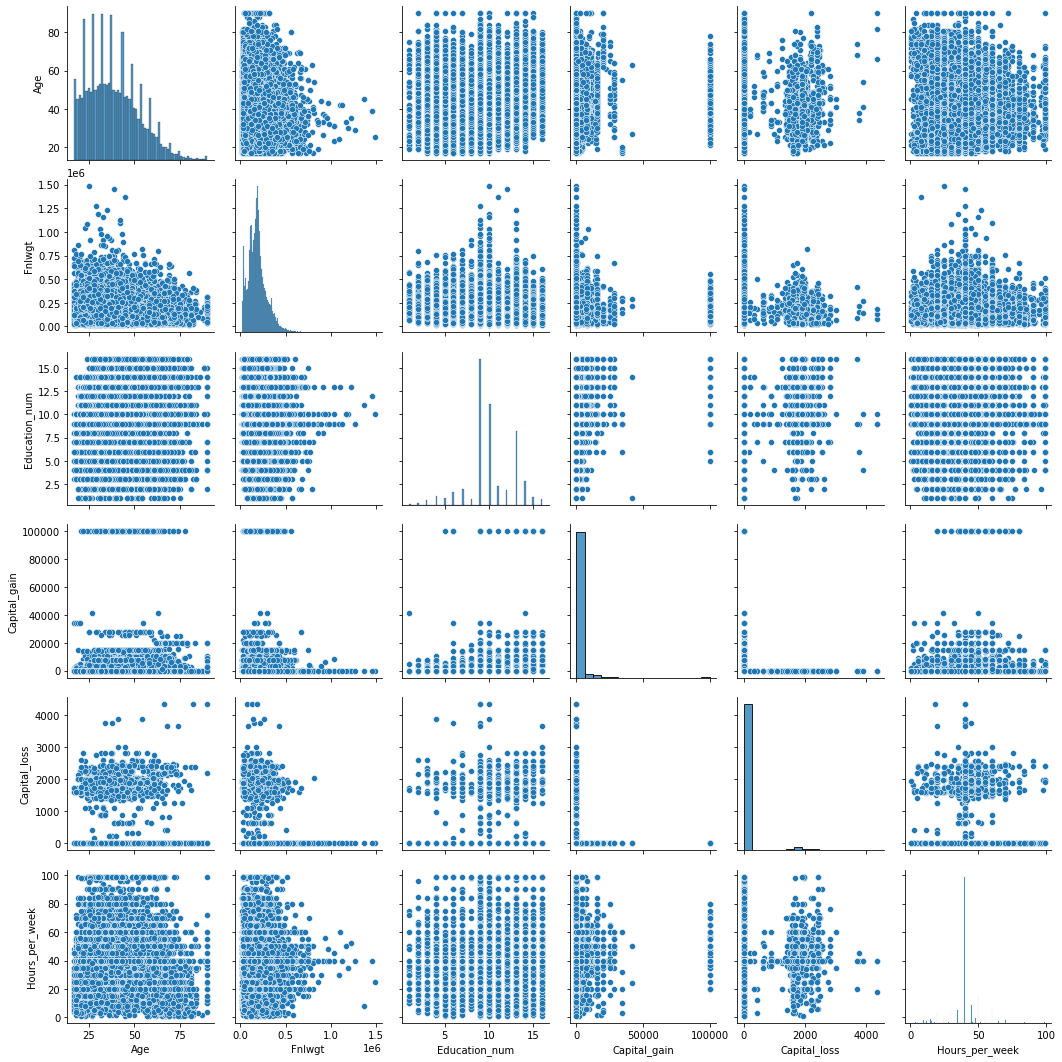

In [32]:
 # Creating a pairplot of dataset
sns.pairplot(df)
plt.savefig('multi1.png')
plt.show()

## Encoding the DataFrame :

In [33]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [34]:
for col in df.columns:
    if df[col].dtypes== 'object':
        le=LabelEncoder()
        df[col]=le.fit_transform(df[col])
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
32556,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
32557,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
32558,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0


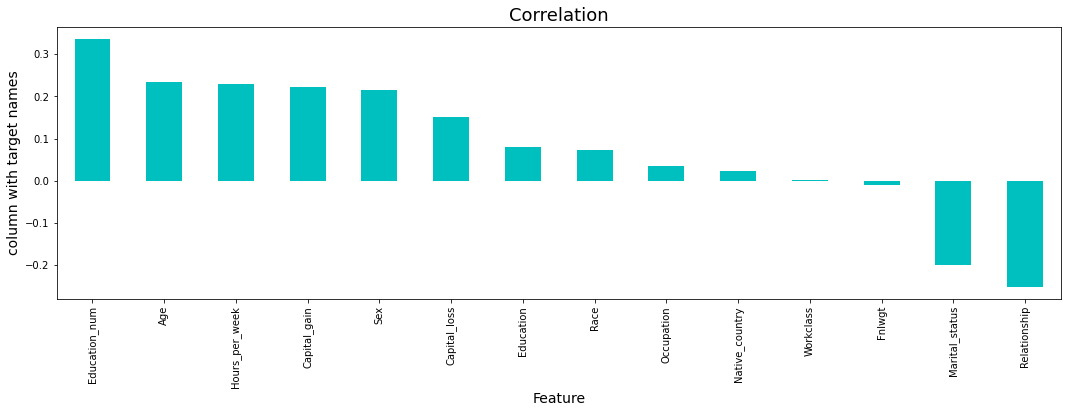

In [35]:
plt.figure(figsize=(18,5))
df.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

- Variables below 0 ,'Marital_status' and 'Relationship' negatively related to the target variable.
- Variables above 0 are positvely related to the target variable.


### Sepearating target variable : -

In [36]:
x = df.drop('Income', axis=1)
y = df['Income']

### Checking the skewness

In [37]:
df.skew()

Age                0.558738
Workclass          0.076178
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.000536
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -4.243083
Income             1.212383
dtype: float64

keeping +/- 0.5 as the range for skeness.

### Handling the skewness



In [38]:
from sklearn.preprocessing import power_transform
df=power_transform(x)
df=pd.DataFrame(df,columns=x.columns)
df.skew()

Age              -0.013897
Workclass         0.216967
Fnlwgt            0.016914
Education        -0.309431
Education_num     0.023885
Marital_status   -0.114201
Occupation       -0.237163
Relationship      0.122917
Race             -2.010817
Sex              -0.719244
Capital_gain      3.016951
Capital_loss      4.299511
Hours_per_week    0.229556
Native_country   -2.981838
dtype: float64

### Handling the outliers :-

In [39]:
from numpy import percentile

columns = df.columns
for j in columns:
    if isinstance(df[j][0], str) :
        continue
    else:
        for i in range(len(df)):
            #defining quartiles
            quartiles = percentile(df[j], [25,75])
            # calculate min/max
            lower_fence = quartiles[0] - (1.5*(quartiles[1]-quartiles[0]))
            upper_fence = quartiles[1] + (1.5*(quartiles[1]-quartiles[0]))
            if df[j][i] > upper_fence:
                df[j][i] = upper_fence
            elif df[j][i] < lower_fence:
                df[j][i] = lower_fence

## Feature Selection¶

In [40]:
from sklearn.ensemble import ExtraTreesClassifier
selector = ExtraTreesClassifier(random_state=42)

In [41]:
selector.fit(x, y)

ExtraTreesClassifier(random_state=42)

In [42]:
feature_imp = selector.feature_importances_

In [43]:
for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))

0 15.6
1 4.14
2 16.71
3 3.87
4 8.66
5 8.09
6 7.25
7 8.54
8 1.46
9 2.86
10 8.84
11 2.81
12 9.64
13 1.53


In [44]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.891947,-0.096137,-1.089889,-0.477012,1.164793,-0.383427,-0.717443,-1.094635,0.412893,0.703087,-0.30137,-0.221213,-0.64304,0.294407
1,0.102717,-0.096137,0.398743,0.090482,-0.464330,-1.782434,-0.184920,0.134511,0.412893,0.703087,-0.30137,-0.221213,-0.03557,0.294407
2,1.064381,-0.096137,0.562540,-1.785230,-1.200274,-0.383427,-0.184920,-1.094635,0.412893,0.703087,-0.30137,-0.221213,-0.03557,0.294407
3,-0.731663,-0.096137,1.340398,-0.477012,1.164793,-0.383427,0.743395,1.549018,0.412893,-1.422298,-0.30137,-0.221213,-0.03557,0.294407
4,0.028023,-0.096137,0.957182,0.395133,1.600809,-0.383427,-0.717443,1.549018,0.412893,-1.422298,-0.30137,-0.221213,-0.03557,0.294407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,-0.827983,-0.096137,0.746749,-0.984718,0.739697,-0.383427,1.366965,1.549018,0.412893,-1.422298,-0.30137,-0.221213,-0.19755,0.294407
32556,0.247374,-0.096137,-0.193298,0.090482,-0.464330,-0.383427,0.060934,-1.094635,0.412893,0.703087,-0.30137,-0.221213,-0.03557,0.294407
32557,1.334556,-0.096137,-0.219755,0.090482,-0.464330,2.171784,-1.721574,1.351388,0.412893,-1.422298,-0.30137,-0.221213,-0.03557,0.294407
32558,-1.358341,-0.096137,0.271668,0.090482,-0.464330,0.919719,-1.721574,1.091081,0.412893,0.703087,-0.30137,-0.221213,-0.64304,0.294407


## Normalisation

In [45]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import f1_score


In [46]:
x=x.drop(['Workclass', 'Education', 'Race', 'Sex',
            'Capital_loss', 'Native_country'] ,axis=1)

## Checking & handling class-imbalance in target variable :-

In [47]:
round(y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    75.92 %
1    24.08 %
Name: Income, dtype: object

In [48]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [49]:
ros = RandomOverSampler(random_state=42)

In [50]:
ros.fit(x,y)

RandomOverSampler(random_state=42)

In [51]:
x_resampled,y_resampled=ros.fit_resample(x,y)

features=x
target=y
features_train=x_train
features_test=x_test
target_train=y_train
target_test=y_test
from sklearn.metrics import accuracy_score

In [52]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression
maxAccuracy=0
maxRs=0
for i in range(100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    predrf=lr.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccuracy:
        macAccuracy=acc
        maxRS=i
print('The best accuracy is', maxAccuracy,' on Random state',maxRS)

The best accuracy is 0  on Random state 99


In [53]:
#x_train,y_train,x_test,y_test=train_test_split(x,y,test_size=0.22,random_state=99)

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=99)

In [55]:
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (39550, 8)
x_test shape: (9888, 8)
y_train shape: (39550,)
y_test shape: (9888,)


## Logistic Regression Model :-

In [56]:
from sklearn.linear_model import LogisticRegression
ln= LogisticRegression(random_state=99)
ln.fit(x_train,y_train)
y_pred_ln=ln.predict(x_test)

print('Logistic Regression:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_ln) * 100, 2))
print('F1 score:', round(f1_score(y_test, y_pred_ln) * 100, 2))

Logistic Regression:
Accuracy score: 68.46
F1 score: 69.37


## Random Forest Classifier Model :-

In [57]:
from sklearn.ensemble import RandomForestClassifier
rdf= RandomForestClassifier(random_state=42)
rdf.fit(x_train,y_train)
y_pred_rdf=rdf.predict(x_test)

print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_rdf) * 100, 2))
print('F1 score:', round(f1_score(y_test, y_pred_rdf) * 100, 2))


Random Forest Classifier:
Accuracy score: 92.77
F1 score: 93.06


## Decision Tree Classifier model testing -


In [58]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_test,y_test)
predictiondtc=dtc.predict(x_test)
print(accuracy_score(y_test,predictiondtc))
print(confusion_matrix(y_test,predictiondtc))
print(classification_report(y_test,predictiondtc))

1.0
[[4990    0]
 [   0 4898]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4990
           1       1.00      1.00      1.00      4898

    accuracy                           1.00      9888
   macro avg       1.00      1.00      1.00      9888
weighted avg       1.00      1.00      1.00      9888



## Nearest Neighbors Classifier model testing -

In [59]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predictionknn=knn.predict(x_test)
print(accuracy_score(y_test,predictionknn))
print(confusion_matrix(y_test,predictionknn))
print(classification_report(y_test,predictionknn))

0.7466626213592233
[[3682 1308]
 [1197 3701]]
              precision    recall  f1-score   support

           0       0.75      0.74      0.75      4990
           1       0.74      0.76      0.75      4898

    accuracy                           0.75      9888
   macro avg       0.75      0.75      0.75      9888
weighted avg       0.75      0.75      0.75      9888



In [60]:
def kneighbors(k):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    knn.score(x_train,y_train)
    predictionknn=knn.predict(x_test)
    print(accuracy_score(y_test,predictionknn))
    print(confusion_matrix(y_test,predictionknn))
    print(classification_report(y_test,predictionknn))

In [61]:
kneighbors(3)

0.7679004854368932
[[3314 1676]
 [ 619 4279]]
              precision    recall  f1-score   support

           0       0.84      0.66      0.74      4990
           1       0.72      0.87      0.79      4898

    accuracy                           0.77      9888
   macro avg       0.78      0.77      0.77      9888
weighted avg       0.78      0.77      0.77      9888



In [62]:
kneighbors(4)

0.7466626213592233
[[3682 1308]
 [1197 3701]]
              precision    recall  f1-score   support

           0       0.75      0.74      0.75      4990
           1       0.74      0.76      0.75      4898

    accuracy                           0.75      9888
   macro avg       0.75      0.75      0.75      9888
weighted avg       0.75      0.75      0.75      9888



In [63]:
kneighbors(5)

0.7183454692556634
[[3153 1837]
 [ 948 3950]]
              precision    recall  f1-score   support

           0       0.77      0.63      0.69      4990
           1       0.68      0.81      0.74      4898

    accuracy                           0.72      9888
   macro avg       0.73      0.72      0.72      9888
weighted avg       0.73      0.72      0.72      9888



In [64]:
kneighbors(6)

0.7067152103559871
[[3565 1425]
 [1475 3423]]
              precision    recall  f1-score   support

           0       0.71      0.71      0.71      4990
           1       0.71      0.70      0.70      4898

    accuracy                           0.71      9888
   macro avg       0.71      0.71      0.71      9888
weighted avg       0.71      0.71      0.71      9888



## Cross-Validation score for each model :-

In [65]:
from sklearn.model_selection import cross_val_score

In [66]:
0.7466626213592233-0.8002764127764127

-0.05361379141718936

## Logistic Regression Model :-

In [67]:
cvs=cross_val_score(dtc,x,y,cv=5)
print('The cross validation score for LinearRegression model is :',cvs.mean())
print('The difference between accuracy and crossvalidation score is :67.66181203931204.')

The cross validation score for LinearRegression model is : 0.7995393120393121
The difference between accuracy and crossvalidation score is :67.66181203931204.


## Decision Tree Classifier Model¶


In [68]:
cvs=cross_val_score(dtc,x,y,cv=5)
print('The cross validation score for DecisionTreeClassifier model is :',cvs.mean())
print('The difference between accuracy and crossvalidation score is :0.2008599508599509.')

The cross validation score for DecisionTreeClassifier model is : 0.7988943488943488
The difference between accuracy and crossvalidation score is :0.2008599508599509.


## Random Forest Classifier Model :-

In [69]:
cvs=cross_val_score(dtc,x,y,cv=5)
print('The cross validation score for DecisionTreeClassifier model is :',cvs.mean())
print('The difference between accuracy and crossvalidation score is :91.97128992628993.')

The cross validation score for DecisionTreeClassifier model is : 0.7982186732186731
The difference between accuracy and crossvalidation score is :91.97128992628993.


## Nearest Neighbors Classifier Model : -

In [70]:
cvs=cross_val_score(dtc,x,y,cv=5)
print('The cross validation score for Nearest Neighbors Classifier model is :',cvs.mean())
print('The difference between accuracy and crossvalidation score is :0.05361379141718936.')

The cross validation score for Nearest Neighbors Classifier model is : 0.7984643734643735
The difference between accuracy and crossvalidation score is :0.05361379141718936.


## Hyperparameter Tuning¶


In [71]:
from sklearn.model_selection import RandomizedSearchCV

In [72]:
n_estimators = [int(x) for x in np.linspace(start=40, stop=150, num=15)]
max_depth = [int(x) for x in np.linspace(40, 150, num=15)]

In [73]:
param_dist = {'n_estimators': n_estimators,'max_depth': max_depth,}

In [74]:
rf_tuned = RandomForestClassifier(random_state=42)

In [75]:
rf_cv = RandomizedSearchCV(
    estimator=rf_tuned, param_distributions=param_dist, cv=5, random_state=99)

In [76]:
rf_cv.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [40, 47, 55, 63, 71, 79,
                                                      87, 95, 102, 110, 118,
                                                      126, 134, 142, 150],
                                        'n_estimators': [40, 47, 55, 63, 71, 79,
                                                         87, 95, 102, 110, 118,
                                                         126, 134, 142, 150]},
                   random_state=99)

In [77]:
rf_cv.best_score_

0.914134007585335

In [78]:
rf_cv.best_params_

{'n_estimators': 134, 'max_depth': 87}

In [79]:
rf_best = RandomForestClassifier(
    max_depth=102, n_estimators=40, random_state=42)

In [80]:
rf_best.fit(x_train, y_train)

RandomForestClassifier(max_depth=102, n_estimators=40, random_state=42)

In [81]:
y_pred_rf_best = rf_best.predict(x_test)

In [82]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_rf_best) * 100, 2))
print('F1 score:', round(f1_score(y_test, y_pred_rf_best) * 100, 2))

Random Forest Classifier:
Accuracy score: 92.87
F1 score: 93.14


In [83]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_rf_best)

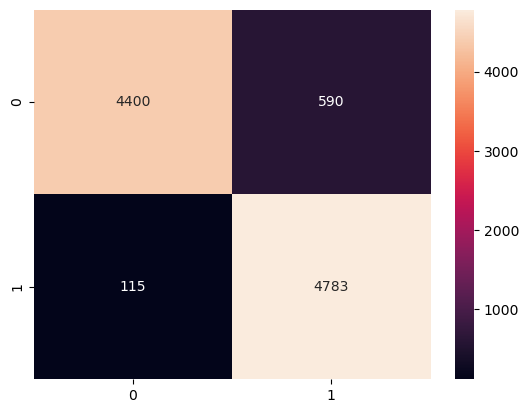

In [84]:
plt.style.use('default')
sns.heatmap(cm, annot=True, fmt='d')
plt.savefig('heatmap.png')
plt.show()

In [85]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf_best))

              precision    recall  f1-score   support

           0       0.97      0.88      0.93      4990
           1       0.89      0.98      0.93      4898

    accuracy                           0.93      9888
   macro avg       0.93      0.93      0.93      9888
weighted avg       0.93      0.93      0.93      9888



## Saving the model¶

In [86]:
import pickle

filename='pickledtcfile.pkl'
pickle.dump(dtc,open('pickledtcfile','wb'))

In [87]:
saved_model=pickle.load(open('pickledtcfile','rb'))
saved_model.predict(x_test)

array([0, 1, 1, ..., 1, 0, 1])